In [12]:
import numpy as np
from computeCost import computeCost
from gradientDescent import gradientDescent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Plotting Data ...


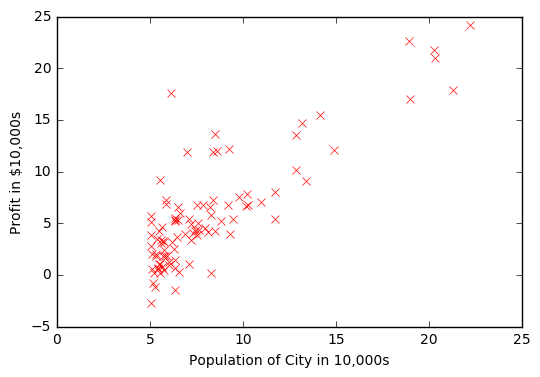

In [13]:
data = np.loadtxt('ex1data1.txt', delimiter = ',')
m = data.shape[0]
X = data[:, 0]
y = data[:, 1]

print 'Plotting Data ...'
plt.plot(X, y, 'rx')
plt.xlim(0, 25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')	
plt.show()

Running Gradient Descent ...
Initial cost:  32.0727338775
Theta found by gradient descent: -3.636095 1.166992


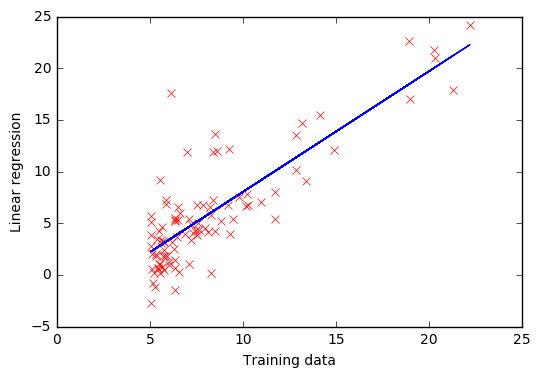

For population = 35,000, we predict a profit of 4483.782875

For population = 70,000, we predict a profit of 45328.513139



In [14]:
print 'Running Gradient Descent ...'

X = np.vstack(zip(np.ones(m), X))
theta = np.zeros(2)

initialCost = computeCost(X, y, theta)

print 'Initial cost: ', initialCost

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print 'Theta found by gradient descent: %f %f' % (theta[0], theta[1])

# Plot the linear fit
plt.plot(X[:,1], y, 'rx')
plt.plot(X[:,1], X.dot(theta), '-')
plt.xlim(0, 25)
plt.xlabel('Training data')
plt.ylabel('Linear regression')
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print 'For population = 35,000, we predict a profit of %f\n' % (predict1 * 10000)

predict2 = np.dot([1, 7], theta)
print 'For population = 70,000, we predict a profit of %f\n' % (predict2 * 10000)

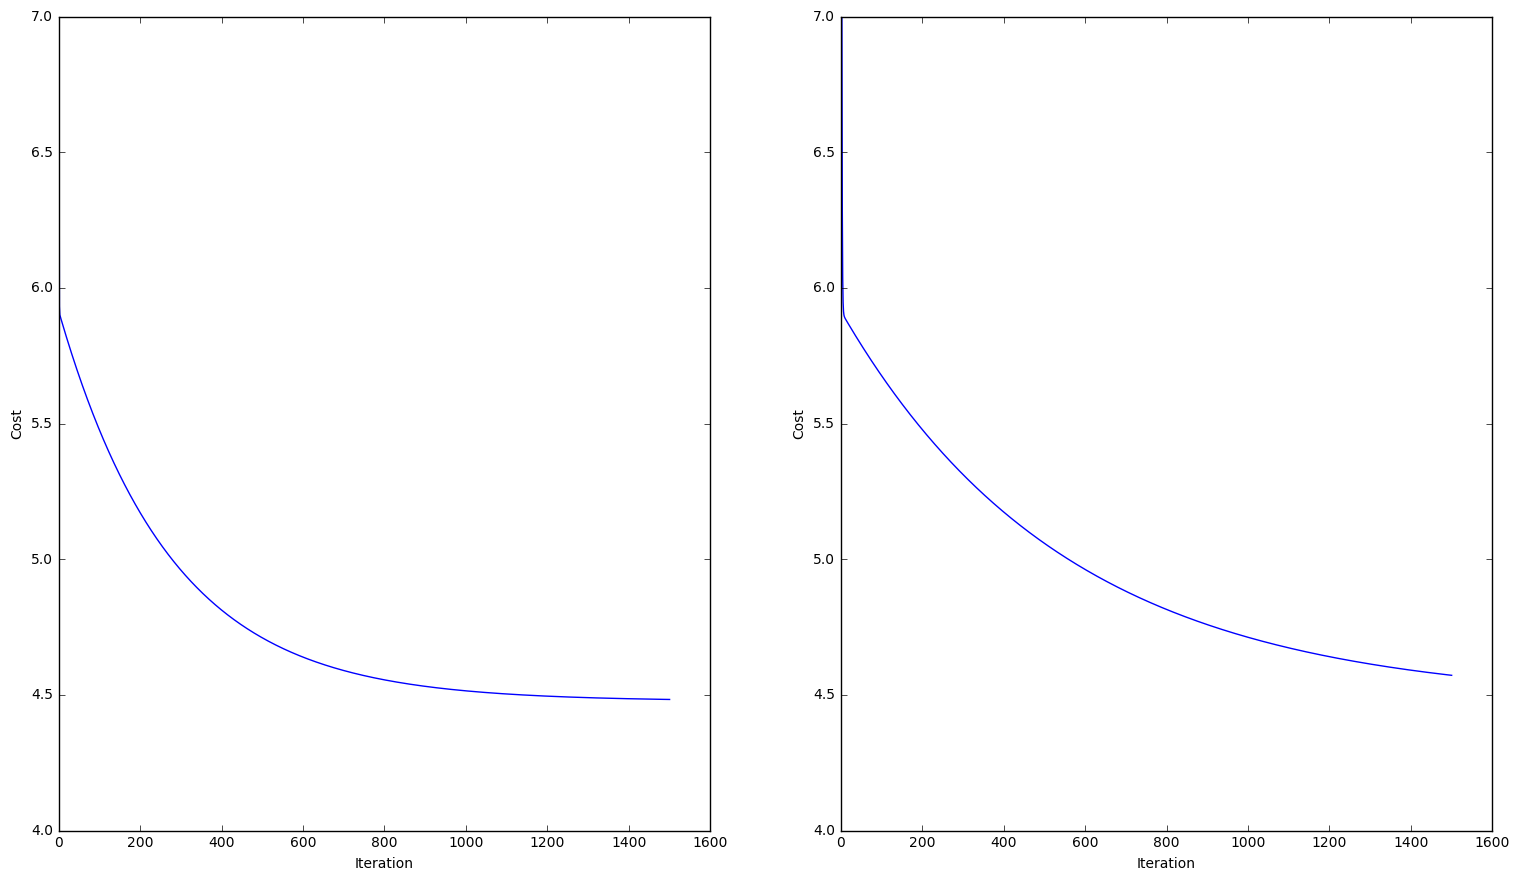

In [15]:
theta2 = np.zeros(2)
alpha2 = 0.005
theta2, J_history2 = gradientDescent(X, y, theta2, alpha2, iterations)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121)
plt.plot(range(1, J_history.size + 1), J_history, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.subplot(122)
plt.plot(range(1, J_history2.size + 1), J_history2, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.ylim(4, 7)
plt.show()

Visualizing J(theta_0, theta_1)


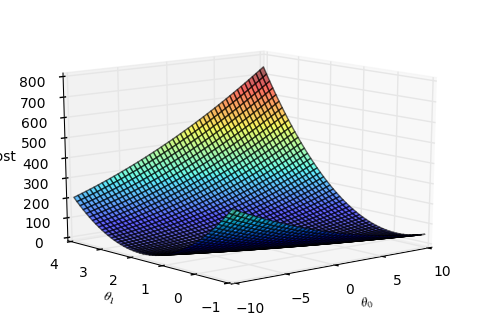

In [16]:
print 'Visualizing J(theta_0, theta_1)'

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 50);
theta1_vals = np.linspace(-1, 4, 50);

theta0_coord, theta1_coord = np.meshgrid(theta0_vals, theta1_vals)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

# Fill out J_vals
for i in range(theta0_vals.size):
	for j in range(theta1_vals.size):
		t = [theta0_vals[i], theta1_vals[j]]   
		J_vals[i,j] = computeCost(X, y, t)

# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(theta0_coord, theta1_coord, J_vals.T, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')
ax.view_init(elev=15, azim=230)
plt.show()